In [3]:
# General Imports
import tensorflow as tf
import pandas as pd
import numpy as np
import random
import os

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Warnings
import warnings
warnings.filterwarnings("ignore")

# Building Model
from keras.utils import plot_model
from tensorflow.keras import models
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import legacy


# Training Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

# Model Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Data Processing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.preprocessing.image import load_img

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")

print("Path to dataset files:", path)


Path to dataset files: C:\Users\RAJATH\.cache\kagglehub\datasets\masoudnickparvar\brain-tumor-mri-dataset\versions\1


In [5]:
classes=[]
filename='C:\\Users\\RAJATH\\.cache\\kagglehub\\datasets\\masoudnickparvar\\brain-tumor-mri-dataset\\versions\\1'
for sub_folder in os.listdir(os.path.join(filename,'Training')):
    classes.append(sub_folder)
print(classes)

['glioma', 'meningioma', 'notumor', 'pituitary']


In [6]:
train_path='C:\\Users\\RAJATH\\.cache\\kagglehub\\datasets\\masoudnickparvar\\brain-tumor-mri-dataset\\versions\\1\\Training\\'
test_path='C:\\Users\\RAJATH\\.cache\\kagglehub\\datasets\\masoudnickparvar\\brain-tumor-mri-dataset\\versions\\1\\Testing\\'

In [7]:
img_list=[]
label_list=[]
for label in classes:
    for img_file in os.listdir(train_path+label):
        img_list.append(train_path+label+'/'+img_file)
        label_list.append(label)

In [8]:
train_data = pd.DataFrame({'Image':img_list,'Label':label_list})
train_data

Image      Label
0     C:\Users\RAJATH\.cache\kagglehub\datasets\maso...     glioma
1     C:\Users\RAJATH\.cache\kagglehub\datasets\maso...     glioma
2     C:\Users\RAJATH\.cache\kagglehub\datasets\maso...     glioma
3     C:\Users\RAJATH\.cache\kagglehub\datasets\maso...     glioma
4     C:\Users\RAJATH\.cache\kagglehub\datasets\maso...     glioma
...                                                 ...        ...
5707  C:\Users\RAJATH\.cache\kagglehub\datasets\maso...  pituitary
5708  C:\Users\RAJATH\.cache\kagglehub\datasets\maso...  pituitary
5709  C:\Users\RAJATH\.cache\kagglehub\datasets\maso...  pituitary
5710  C:\Users\RAJATH\.cache\kagglehub\datasets\maso...  pituitary
5711  C:\Users\RAJATH\.cache\kagglehub\datasets\maso...  pituitary

[5712 rows x 2 columns]

In [9]:
img_list=[]
label_list=[]
for label in classes:
    for img_file in os.listdir(test_path+label):
        img_list.append(test_path+label+'/'+img_file)
        label_list.append(label)

In [10]:
test_data = pd.DataFrame({'Image':img_list,'Label':label_list})
test_data

Image      Label
0     C:\Users\RAJATH\.cache\kagglehub\datasets\maso...     glioma
1     C:\Users\RAJATH\.cache\kagglehub\datasets\maso...     glioma
2     C:\Users\RAJATH\.cache\kagglehub\datasets\maso...     glioma
3     C:\Users\RAJATH\.cache\kagglehub\datasets\maso...     glioma
4     C:\Users\RAJATH\.cache\kagglehub\datasets\maso...     glioma
...                                                 ...        ...
1306  C:\Users\RAJATH\.cache\kagglehub\datasets\maso...  pituitary
1307  C:\Users\RAJATH\.cache\kagglehub\datasets\maso...  pituitary
1308  C:\Users\RAJATH\.cache\kagglehub\datasets\maso...  pituitary
1309  C:\Users\RAJATH\.cache\kagglehub\datasets\maso...  pituitary
1310  C:\Users\RAJATH\.cache\kagglehub\datasets\maso...  pituitary

[1311 rows x 2 columns]

In [11]:
def Plot_Classes(BASE_URL, Rows=2, Columns=5):


  plt.figure(figsize = (25, 8))

  image_count = 1

  for directory in os.listdir(BASE_URL):

      if directory[0] != '.':

          Max_Random = len(os.listdir(os.path.join(BASE_URL,directory)))

          Random_Number = np.random.randint(0, Max_Random)

          for i, file in enumerate(os.listdir(BASE_URL + directory)):

              if i == Random_Number:

                  fig = plt.subplot(Rows, Columns, image_count)
                  image_count += 1

                  image = plt.imread(BASE_URL + directory + '/' + file)
                  plt.imshow(image)

                  plt.title(directory)

                  break

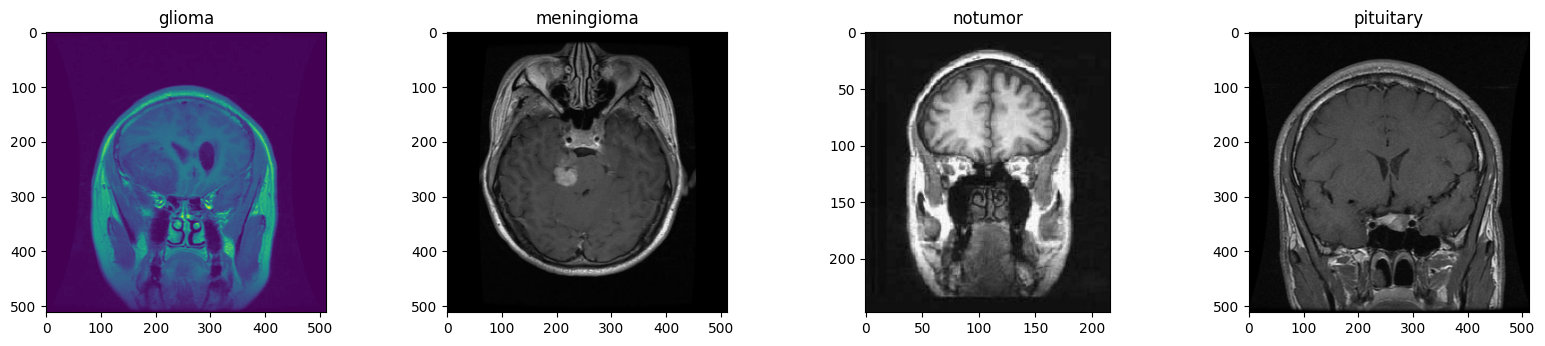

In [12]:
Plot_Classes(train_path)

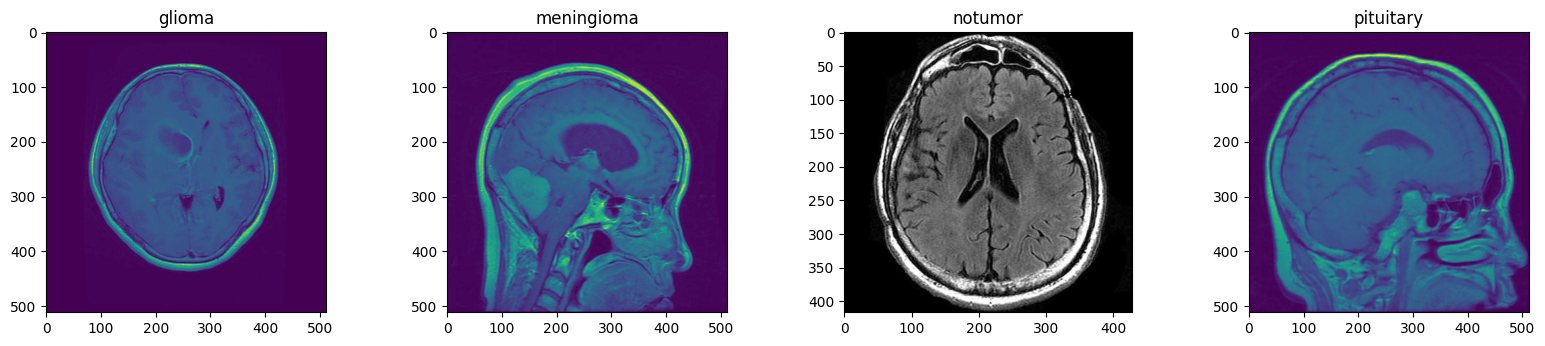

In [13]:
Plot_Classes(test_path)


In [14]:
train_data['Label'].value_counts()

Label
notumor       1595
pituitary     1457
meningioma    1339
glioma        1321
Name: count, dtype: int64

In [15]:
px.histogram(train_data, y="Label", color="Label", title="Classes Distribution")

In [16]:
test_data['Label'].value_counts()

Label
notumor       405
meningioma    306
glioma        300
pituitary     300
Name: count, dtype: int64

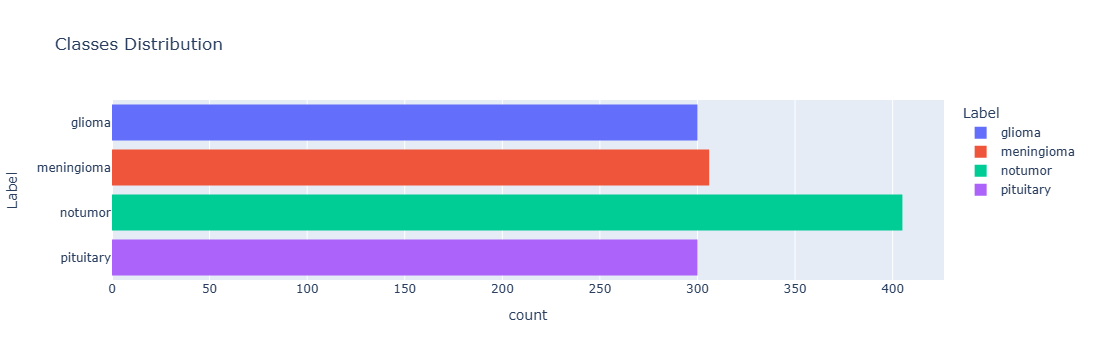

In [17]:
px.histogram(test_data, y="Label", color="Label", title="Classes Distribution")

In [18]:
# Image size
image_size = (150, 150)

# Training batch size
batch_size = 32

In [19]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.15, 
                                   rotation_range=10,
                                   brightness_range=(0.85, 1.15),
                                   width_shift_range=0.002,
                                   height_shift_range=0.002,
                                   shear_range=12.5,
                                   zoom_range=0,
                                   horizontal_flip=True,
                                   vertical_flip=False,
                                   fill_mode="nearest")

val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)

# Creating training data generator
train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=image_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    subset='training',  
                                                    seed=0)

# Creating validation data generator
val_generator = val_datagen.flow_from_directory(train_path,
                                                target_size=image_size,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                subset='validation', 
                                                seed=0)

# No augmentation of the test data, just rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# applying the generator to testing data with constant seed
test_generator = test_datagen.flow_from_directory(test_path,
                                                  target_size=image_size,
                                                  batch_size=batch_size,
                                                  class_mode="categorical",
                                                  shuffle=False,
                                                  seed=0)

Found 4857 images belonging to 4 classes.
Found 855 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [20]:
def show_ImageDataGenerator(ImageDataGenerator, num_samples=5, figsize=(12, 12), save=False):
    """
    Function to viusalize how the ImageDataGenerator augments the data
    """

    # Generate augmented samples
    # Use __next__() instead of next()
    augmented_samples = train_generator.__next__()

    # Extract images from the batch
    images = augmented_samples[0][:num_samples]

    # Display the augmented images
    fig, axes = plt.subplots(1, num_samples, figsize=figsize)

    for i, ax in enumerate(axes):
        ax.imshow(images[i])
        ax.axis('off')

    plt.tight_layout()

    if save:
        plt.savefig('show_ImageDataGenerator.pdf')

    plt.show()

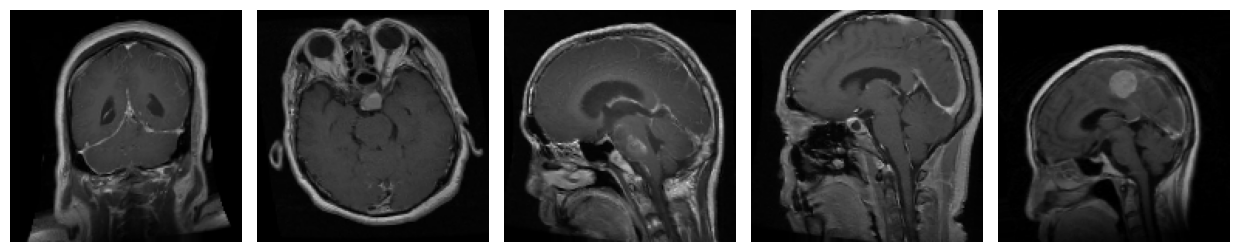

In [21]:
show_ImageDataGenerator(train_datagen, num_samples=5, figsize=(12.5, 8), save=False)

In [22]:
# Image shape: height, width, RBG
image_shape = (image_size[0], image_size[1], 3)


print(f'Image shape: {image_shape}')
print(f'Batch size: {batch_size}')
print(f'Number of Train batches: {len(train_generator)}')
print(f'Number of Validation batches: {len(val_generator)}')
print(f'Number of Testing batches: {len(test_generator)}')

Image shape: (150, 150, 3)
Batch size: 32
Number of Train batches: 152
Number of Validation batches: 27
Number of Testing batches: 41


In [23]:
Classes_Map = train_generator.class_indices

num_classes = len(Classes_Map)

print("Number of Classes:", num_classes)
Classes_Map

Number of Classes: 4


{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [24]:
def plot_curves(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.figure(figsize=(15,5))
  plt.style.use('ggplot')


  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, 'bo-' , label = "TrainL oss")
  plt.plot(epochs, val_loss, 'o-' , color='orange', label = "Val Loss")
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()


  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, 'bo-' , label = "Train Acc")
  plt.plot(epochs, val_accuracy, 'o-' , color='orange' , label = "Val Acc")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend()

  plt.style.use('default')

In [25]:
def CM(model, test_generator, categories):
    """
    Function to return the confusion matrix of a given CNN model.
    """
    from sklearn.metrics import confusion_matrix
    # Predictions on test dataset
    predictions = model.predict(test_generator)
    predicted_categories = np.argmax(predictions, axis=1)
    true_categories = test_generator.classes

    # Create a confusion matrix
    confusion_matrix_array = confusion_matrix(true_categories, predicted_categories)
    print(f"Classification Report for {model}:")
    print(classification_report(true_categories, predicted_categories, target_names=categories))

    return confusion_matrix_array


def calculate_metrics(confusion_matrix, categories):
    """
    Function to calculate important metrics for multi-classification problems.
    """
    # Calculating 4 different metrics
    precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
    recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)
    f1_score = 2 * (precision * recall) / (precision + recall)
    accuracy = np.sum(np.diag(confusion_matrix)) / np.sum(confusion_matrix)

    # Printing the results based on each category
    for i, category in enumerate(categories):
        print(f"Class: {category.title()}")
        print(f"Precision: {precision[i]:.3f}")
        print(f"Recall: {recall[i]:.3f}")
        print(f"F1-Score: {f1_score[i]:.3f}\n")

    # Showing the total accuracy of the model
    print(f"\nAccuracy: {accuracy:.3f}")

In [26]:
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


base_model_resnet = ResNet101(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


# for layer in base_model_resnet.layers[:-10]:
#     layer.trainable = False

# for layer in base_model_resnet.layers[-10:]:
#     layer.trainable = True
    

# Add custom classification head
x = base_model_resnet.output
x = GlobalAveragePooling2D()(x)

x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)  

model_resnet = Model(inputs=base_model_resnet.input, outputs=output)

model_resnet.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

model_resnet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 156, 156, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 75, 75, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 75, 75, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [27]:
resnet_history = model_resnet.fit(train_generator,epochs=10,validation_data=val_generator)

Epoch 1/10
152/152 [==============================] - 2739s 17s/step - loss: 0.3057 - accuracy: 0.8816 - val_loss: 10.9967 - val_accuracy: 0.2795
Epoch 2/10
152/152 [==============================] - 2546s 17s/step - loss: 0.1189 - accuracy: 0.9578 - val_loss: 6.2680 - val_accuracy: 0.2795
Epoch 3/10
152/152 [==============================] - 2437s 16s/step - loss: 0.0960 - accuracy: 0.9664 - val_loss: 9.8152 - val_accuracy: 0.2865
Epoch 4/10
152/152 [==============================] - 2391s 16s/step - loss: 0.0734 - accuracy: 0.9784 - val_loss: 9.3766 - val_accuracy: 0.2912
Epoch 5/10
152/152 [==============================] - 2376s 16s/step - loss: 0.0473 - accuracy: 0.9839 - val_loss: 2.4875 - val_accuracy: 0.3485
Epoch 6/10
152/152 [==============================] - 2361s 16s/step - loss: 0.0415 - accuracy: 0.9868 - val_loss: 0.2781 - val_accuracy: 0.9041
Epoch 7/10
152/152 [==============================] - 2374s 16s/step - loss: 0.0289 - accuracy: 0.9905 - val_loss: 0.1633 - val_a

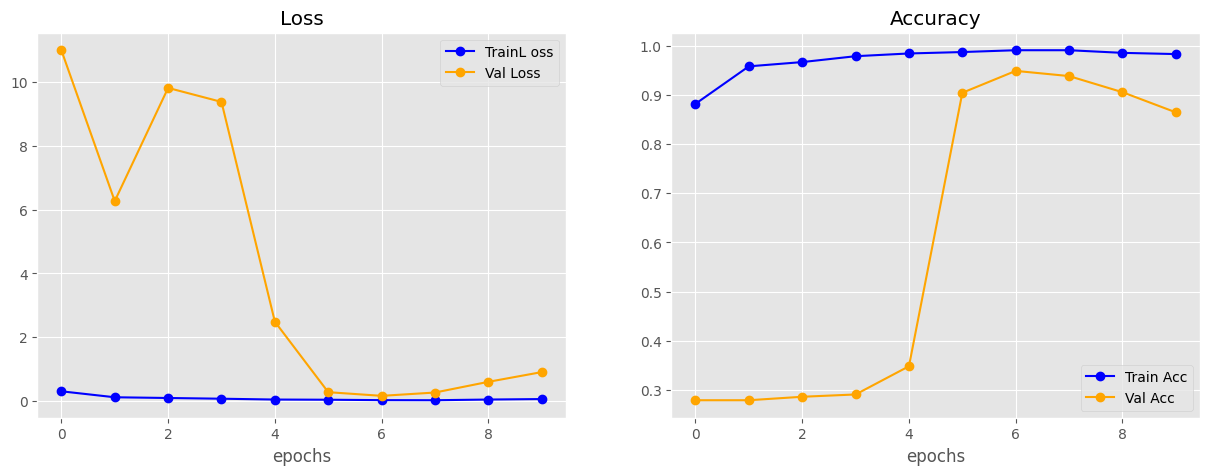

In [28]:
plot_curves(resnet_history)

In [29]:
loss, accuracy = model_resnet.evaluate(test_generator)
print(f"Test Loss: {loss:0.5f}")
print(f"Test Accuracy: {accuracy:0.5f}")
#testing-101
model_resnet.save('C:\\Users\\RAJATH\\OneDrive\\Desktop\\final ml\\trained_model_resnet.h5')

41/41 [==============================] - 154s 4s/step - loss: 0.3399 - accuracy: 0.9382
Test Loss: 0.33987
Test Accuracy: 0.93822


41/41 [==============================] - 152s 4s/step
Classification Report for <keras.src.engine.functional.Functional object at 0x00000238836D48E0>:
              precision    recall  f1-score   support

      glioma       0.82      0.99      0.90       300
  meningioma       0.99      0.82      0.90       306
     notumor       0.98      1.00      0.99       405
   pituitary       0.98      0.93      0.95       300

    accuracy                           0.94      1311
   macro avg       0.94      0.93      0.93      1311
weighted avg       0.95      0.94      0.94      1311



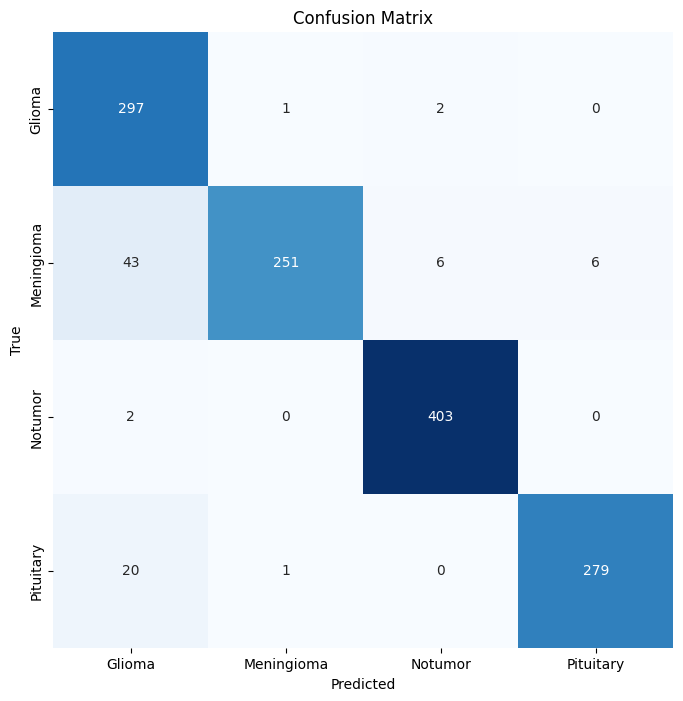

In [30]:
# Plotting confusion matrix
confusion_matrix = CM(model=model_resnet, test_generator=test_generator, categories=classes)

plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(ticks=np.arange(4) + 0.5,
           labels=[name.title() for name in classes], ha='center')
plt.yticks(ticks=np.arange(4) + 0.5,
           labels=[name.title() for name in classes], va='center')
plt.show()


{'glioma': 0.0, 'meningioma': 0.0, 'notumor': 0.0, 'pituitary': 100.0}
{'glioma': 3.569, 'meningioma': 0.01, 'notumor': 0.008, 'pituitary': 96.414}
{'glioma': 0.0, 'meningioma': 0.0, 'notumor': 0.0, 'pituitary': 100.0}
{'glioma': 0.06, 'meningioma': 0.003, 'notumor': 0.0, 'pituitary': 99.937}
{'glioma': 0.0, 'meningioma': 0.0, 'notumor': 0.0, 'pituitary': 100.0}
{'glioma': 11.736, 'meningioma': 14.829, 'notumor': 1.007, 'pituitary': 72.428}
{'glioma': 0.0, 'meningioma': 0.0, 'notumor': 0.0, 'pituitary': 100.0}
{'glioma': 0.098, 'meningioma': 0.119, 'notumor': 0.028, 'pituitary': 99.756}
{'glioma': 0.0, 'meningioma': 0.0, 'notumor': 0.0, 'pituitary': 99.999}
{'glioma': 0.0, 'meningioma': 0.0, 'notumor': 0.0, 'pituitary': 100.0}


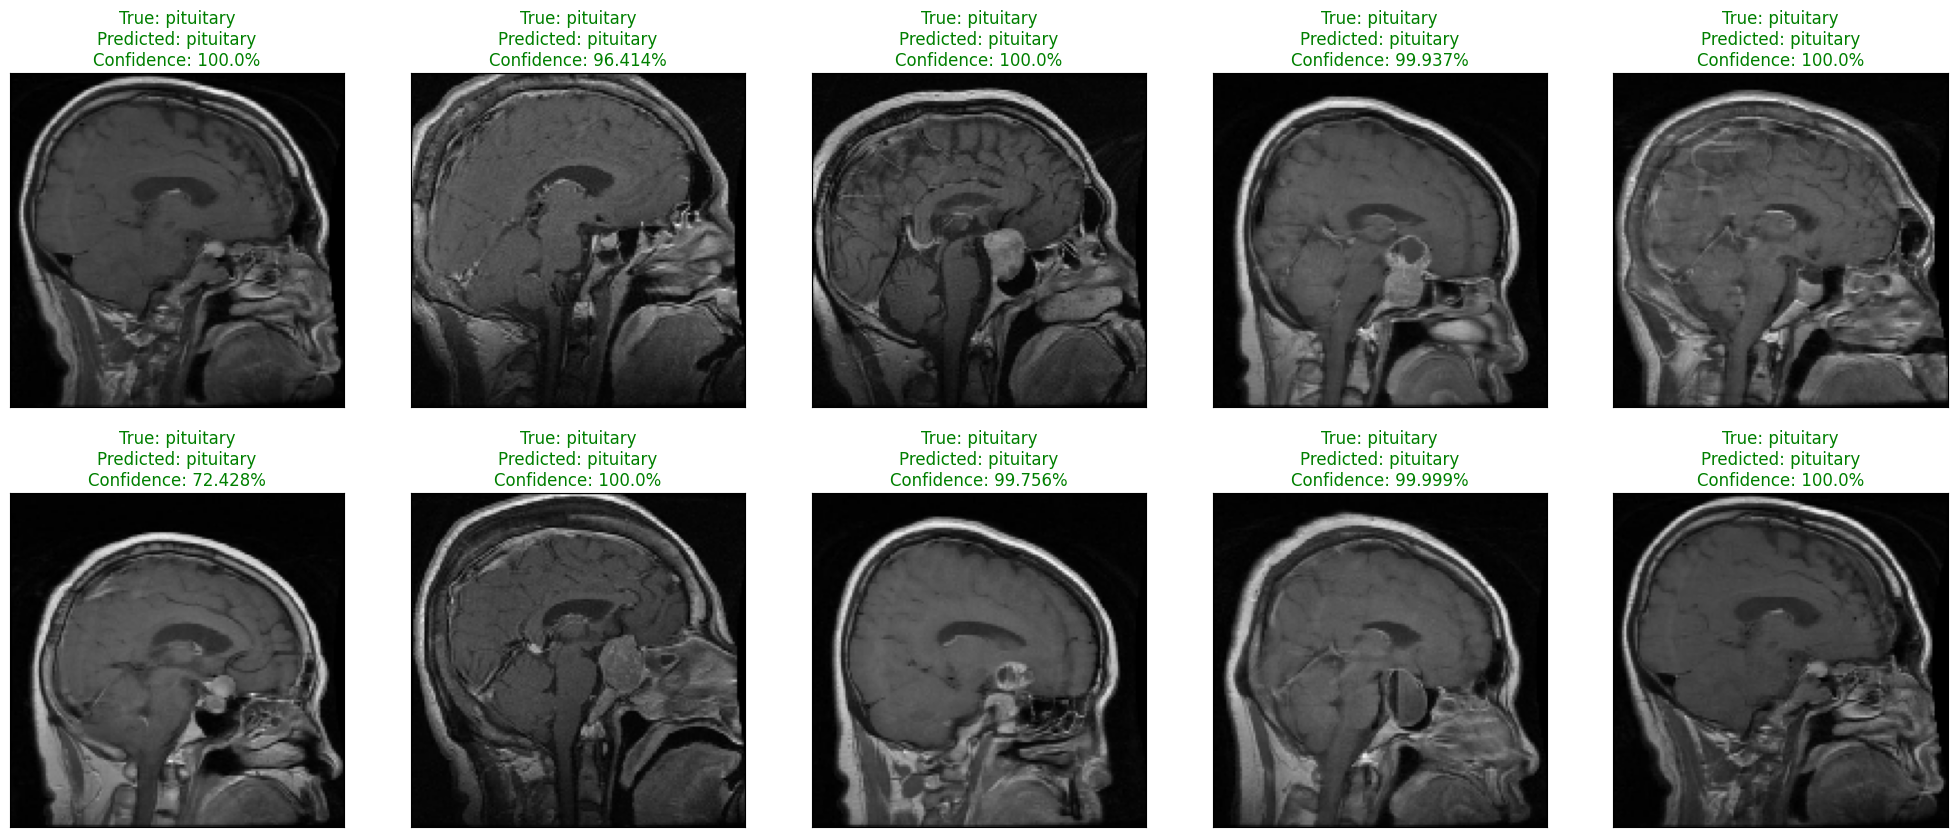

<Figure size 640x480 with 0 Axes>

In [31]:
# Display 10 random pictures predictions from the dataset with their labels

Random_batch = np.random.randint(0, len(test_generator))

Random_Img_Index = np.random.randint(0, batch_size , 10)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):

    Random_Img = test_generator[Random_batch][0][Random_Img_Index[i]]

    Random_Img_Label = np.argmax(test_generator[Random_batch][1][Random_Img_Index[i]])

    Model_Predictions = model_resnet.predict( tf.expand_dims(Random_Img, axis=0) , verbose=0)

    Model_Highest_Prediction = np.argmax(Model_Predictions)

    Model_Predictions_Map = { c: round(p*100,3) for (c,p) in zip (classes, Model_Predictions.tolist()[0] ) }

    ax.imshow(Random_Img)

    Pred_Class = classes[Model_Highest_Prediction]

    if classes[Random_Img_Label] == Pred_Class:
      color = "green"
    else:
      color = "red"
    ax.set_title(f"True: {classes[Random_Img_Label]}\nPredicted: {Pred_Class}\nConfidence: {Model_Predictions_Map[Pred_Class]}%",
          color=color)
    print(Model_Predictions_Map)
plt.show()
plt.tight_layout()


In [32]:
import os
from tensorflow.keras.models import load_model

# Path to your model
model_path = 'C:\\Users\\RAJATH\\OneDrive\\Desktop\\final ml\\trained_model_resnet.h5'

# Function to check if model exists and is loaded successfully
def check_if_model_saved(model_path):
    if os.path.exists(model_path):
        try:
            model = load_model(model_path)
            print("Model loaded successfully.")
            return True  # Model is loaded successfully
        except Exception as e:
            print(f"Error loading model: {e}")
            return False  # There was an error loading the model
    else:
        print("Model file does not exist.")
        return False  # Model file does not exist

# Check if model is saved
is_model_saved = check_if_model_saved(model_path)

if is_model_saved:
    print("Model is saved and ready to use.")
else:
    print("Model is not saved or could not be loaded.")


Model loaded successfully.
Model is saved and ready to use.


In [1]:
pip install tensorflow h5py


Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf

# Path to your model file
model_path ="C:\\Users\\RAJATH\\OneDrive\\Desktop\\final ml\\trained_model_resnet.h5"

# Load the model
try:
    model = tf.keras.models.load_model(model_path)
    print("Model loaded successfully!")
    model.summary()
except Exception as e:
    print(f"Error loading model: {e}")


Model loaded successfully!
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 156, 156, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 75, 75, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 75, 75, 64)           256       ['conv1_conv[0][0]']          
 on)                                                               

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import ipywidgets as widgets
from ipywidgets import interact
from PIL import Image
import matplotlib.pyplot as plt

# Load the pre-trained model (replace with your model path)
MODEL_PATH = 'C:\\Users\\RAJATH\\OneDrive\\Desktop\\final ml\\trained_model_resnet.h5'  # Update the path to your model
model = load_model(MODEL_PATH)

# Define the classes
CLASS_LABELS = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary Tumor']

# Function to preprocess and predict the image
def predict_tumor(img):
    # Preprocess the image
    img = img.resize((150, 150))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = CLASS_LABELS[np.argmax(predictions)]
    confidence = round(100 * np.max(predictions), 2)

    # Display result
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_class} ({confidence}%)")
    plt.axis('off')
    plt.show()

# Create a file upload widget
upload_widget = widgets.FileUpload(
    accept='image/*',
    multiple=False
)

# Create a button to trigger prediction
predict_button = widgets.Button(description="Classify Tumor")

# Function to handle the button click
def on_button_click(change):
    if len(upload_widget.value) > 0:
        # Get the uploaded image
        uploaded_image = Image.open(list(upload_widget.value.values())[0]['content'])
        predict_tumor(uploaded_image)

# Link the button click event
predict_button.on_click(on_button_click)

# Display the upload widget and the button
display(upload_widget, predict_button)


FileUpload(value=(), accept='image/*', description='Upload')

Button(description='Classify Tumor', style=ButtonStyle())